> #### ***SUBMITTED BY: MALAIKA AHMED***

# ***🔴Task 39: Implement RNN with TensorFlow/Keras***


***Objective:*** Building a simple application using RNNs predicting the next word in a sentence.
***




 # <span style='color:Red'>  ***Recurrent Neural Networks*** </span>

- Recurrent Neural Networks (RNN) are designed to work with sequential data. Sequential data(can be time-series) can be in form of text, audio, video etc.

- RNN uses the previous information in the sequence to produce the current output. To understand this better take an example sentence.

                                      “My class is the best class.”

- At the time(T0 ), the first step is to feed the word “My” into the network. the RNN produces an output.

- At the time(T1 ), then at the next step we feed the word “class” and the activation value from the previous step. Now the RNN has information of both words “My” and “class”.

- RNN takes the output from the previous step as an input to the next step. It can retain information from the past and use that information to process new input.

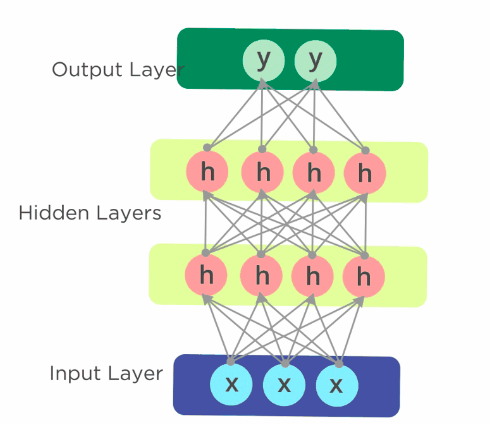

***

 ## <span style='color:Blue'>  ***Types of RNN*** </span>





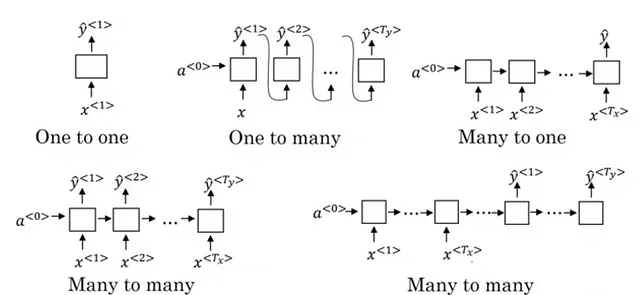



*** 


 ## <span style='color:Blue'>  ***Long Short-Term Memory (LSTM)*** </span>

- 
LSTMs come to the rescue to solve the vanishing gradient problem. It does so by ignoring (forgetting) useless data/information in the network
-  The LSTM will forget the data if there is no useful information from other inputs (prior sentence words). When new information comes, the network determines which information to be overlooked and which to be remembered

- In LSTMs, instead of just a simple network with a single activation function, we have multiple components, giving power to the network to forget and remember information.

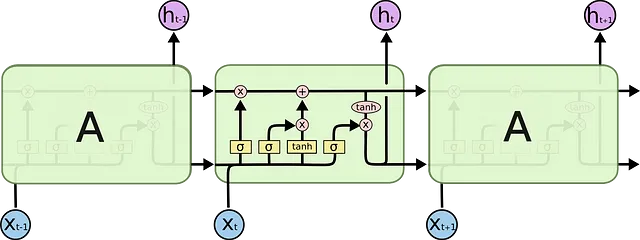





.

***
# ***LSTMs have 3 different components, namely***

- Forget gate
- Input gate
- Output gate





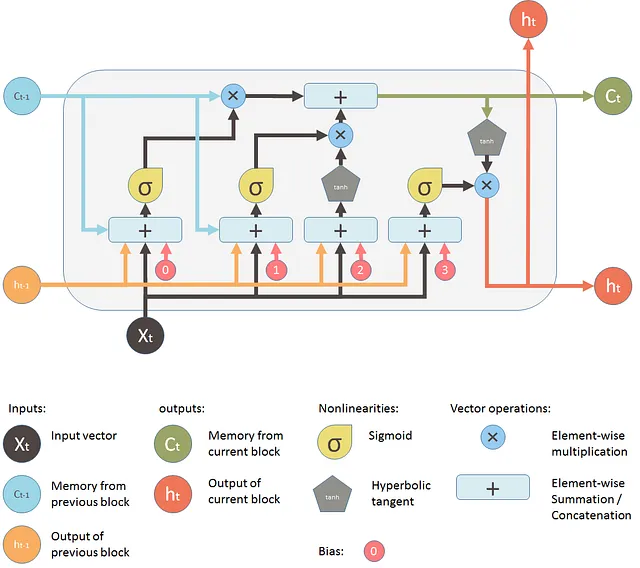


gate



***

##  ***Forget Gate***
- The forget LSTM gate, as the name suggests, decides what information should be forgotten. A sigmoid layer is used to make this decision. This sigmoid layer is called the “forget gate layer”.


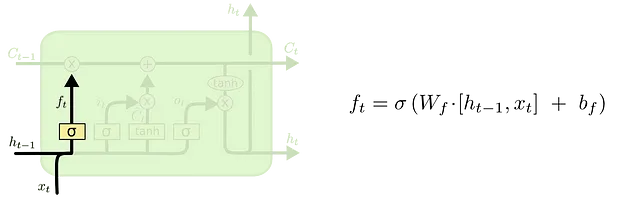



- It does a dot product of h(t-1) and x(t) and with the help of the sigmoid layer, outputs a number between 0 and 1 for each number in the cell state C(t-1). If the output is a ‘1’, it means we will keep it. A ‘0’ means to forget it completely.




## ***Input gate***
- The input gate gives new information to the LSTM and decides if that new information is going to be stored in the cell state.

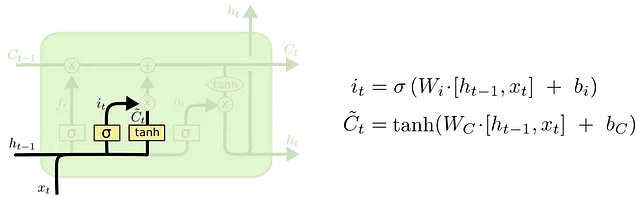




ate.

This has 3 parts:

- A sigmoid layer decides the values to be updated. This layer is called the “input gate layer”
- A tanh activation function layer creates a vector of new candidate values, Č(t), that could be added to the state.
- Then we combine these 2 outputs, i(t) * Č(t), and update the cell state.

## ***Output gate***- 
The output of the LSTM unit depends on the new cell state


- First, a sigmoid layer decides what parts of the cell state we’re going to output.
- Then, a tanh layer is used on the cell state to squash the values between -1 and 1, which is finally multiplied by the sigmoid gate output.





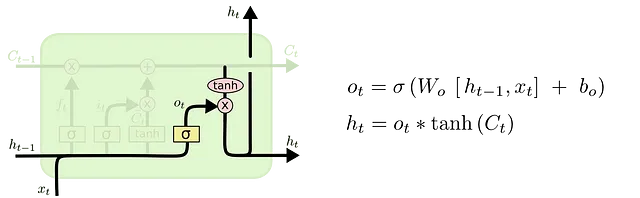.

***
 ## <span style='color:Blue'>  ***LSTM in Action*** </span>

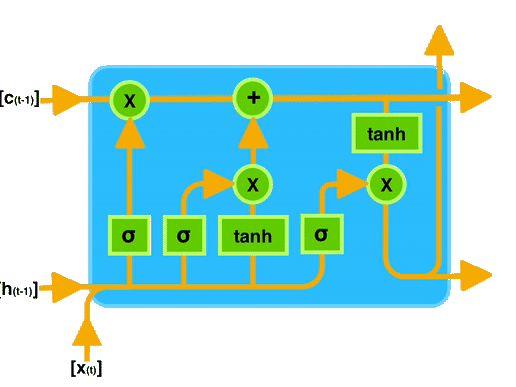


***


 # <span style='color:Red'>  ***Building Next Word Predictor in a Sentence Using RNN*** </span>


In [117]:
text = """ It was November. Although it was not yet late.
the sky was dark when I turned into Laundress Passage. Father had finished for the day.
switched off the shop lights and closed the shutters.
but so I would not come home to darkness he had left on the light over the stairs to the flat. 
Through the glass in the door it cast a foolscap rectangle of paleness onto the wet pavement. 
and it was while I was standing in that rectangle. about to turn my key in the door. that I first saw the letter """

## ***Importing Libraries***

In [118]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np
import time

# ***Tokenization***


In [119]:
# Tokenization
# Initializing the Tokenizer to convert text into sequences of integers
tokenizer = Tokenizer()
# Fitting the tokenizer on the text
tokenizer.fit_on_texts([text])

In [120]:
# Preparing input sequences for training
input_sequences = []
# Splitting the text into sentences based on new lines
for sentence in text.split('\n'):
    # Converting each sentence into a sequence of integers
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    # Creating sub-sequences for training
    # For each sentence, generate sequences that progressively grow in length
    for i in range(1, len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])

In [121]:
# Finding the maximum sequence length to ensure all sequences have the same length
max_len = max([len(x) for x in input_sequences])

In [122]:
max_len

24

## ***Applying Padding Sequences***

In [123]:
# Padding sequences
# Padding all sequences to the same length with zeros at the beginning (pre-padding)
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

In [124]:
padded_input_sequences

array([[ 0,  0,  0, ...,  0,  3,  2],
       [ 0,  0,  0, ...,  3,  2, 13],
       [ 0,  0,  0, ...,  2, 13, 14],
       ...,
       [ 0,  0,  9, ...,  4, 63, 64],
       [ 0,  9,  3, ..., 63, 64,  1],
       [ 9,  3,  2, ..., 64,  1, 65]])

## ***Defining X and y for training***

In [125]:
# X is the input sequence up to the second-to-last word
X = padded_input_sequences[:, :-1]
# y is the last word of each sequence, which we aim to predict
y = padded_input_sequences[:, -1]
# Converting y into categorical (one-hot encoded) format with dimensions equal to the vocabulary size
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)


## ***Building the Sequential RNN model***

In [126]:
model = Sequential()

# Adding an Embedding layer
# The Embedding layer maps each word to a dense vector of fixed size (100 in this case)
# Input dimension is the size of the vocabulary (number of unique words + 1)
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len - 1))

# Adding the first LSTM layer
# LSTM layer with 150 units, set to return sequences to feed into the next LSTM layer
model.add(LSTM(150, return_sequences=True))

# Adding a second LSTM layer
# This LSTM does not return sequences, it outputs a single vector representing the entire sequence
model.add(LSTM(150))

# Adding a Dense output layer
# This layer outputs a probability distribution over the vocabulary, with softmax activation
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))



## ***Compiling the model***


In [127]:
# Using categorical crossentropy as the loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## ***Training the model***

In [128]:
# Fitting the model on the prepared data, with X as input and y as output
model.fit(X, y, epochs=100, verbose=1)



Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.0418 - loss: 4.1897
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0845 - loss: 4.1661   
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1158 - loss: 4.0939
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1080 - loss: 3.9978
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1431 - loss: 3.8817
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1392 - loss: 3.8888
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1588 - loss: 3.8340
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1425 - loss: 3.7972
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1220 - loss: 3.7686
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1448 - loss: 3.6827
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1347 - loss: 3.6533
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1370 -

## ***Checking Model by chunck of text as input***

In [133]:
# Initial text to start the generation process
p_text = "the sky was dark"

In [134]:
# Loop to generate a sequence of 10 words
for i in range(10):
    # Tokenize the current text to convert it into a sequence of integers
    token_text = tokenizer.texts_to_sequences([p_text])[0]
    # Pad the tokenized sequence to the required input length of the model
    padded_token_text = pad_sequences([token_text], maxlen=max_len - 1, padding='pre')

    # Predict the next word based on the current sequence
    pos = np.argmax(model.predict(padded_token_text), axis=-1)[0]

    # Find the word corresponding to the predicted index
    for word, index in tokenizer.word_index.items():
        if index == pos:
            # Append the predicted word to the text
            p_text = p_text + " " + word
            print(p_text)
            # Adding a small delay to slow down the output for better readability
            time.sleep(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
the sky was dark when
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
the sky was dark when i
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
the sky was dark when i turned
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
the sky was dark when i turned into
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
the sky was dark when i turned into laundress
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
the sky was dark when i turned into laundress passage
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
the sky was dark when i turned into laundress passage father
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
the sky was dark when i turned into laundress passage father had
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
the sky was dark when i turned into laundress passage father had finished
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
the sky was dark when i turned into laundress passage father had finished for


***
***